<a href="https://colab.research.google.com/github/orodriguezq/orodriguezq-Senales_Y_Sistemas/blob/main/Parcial_1_SyS_2025-1/Parcial_1_SyS_2025_1__Omar_Andres_Rodriguez_Quiceno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUNTO 1

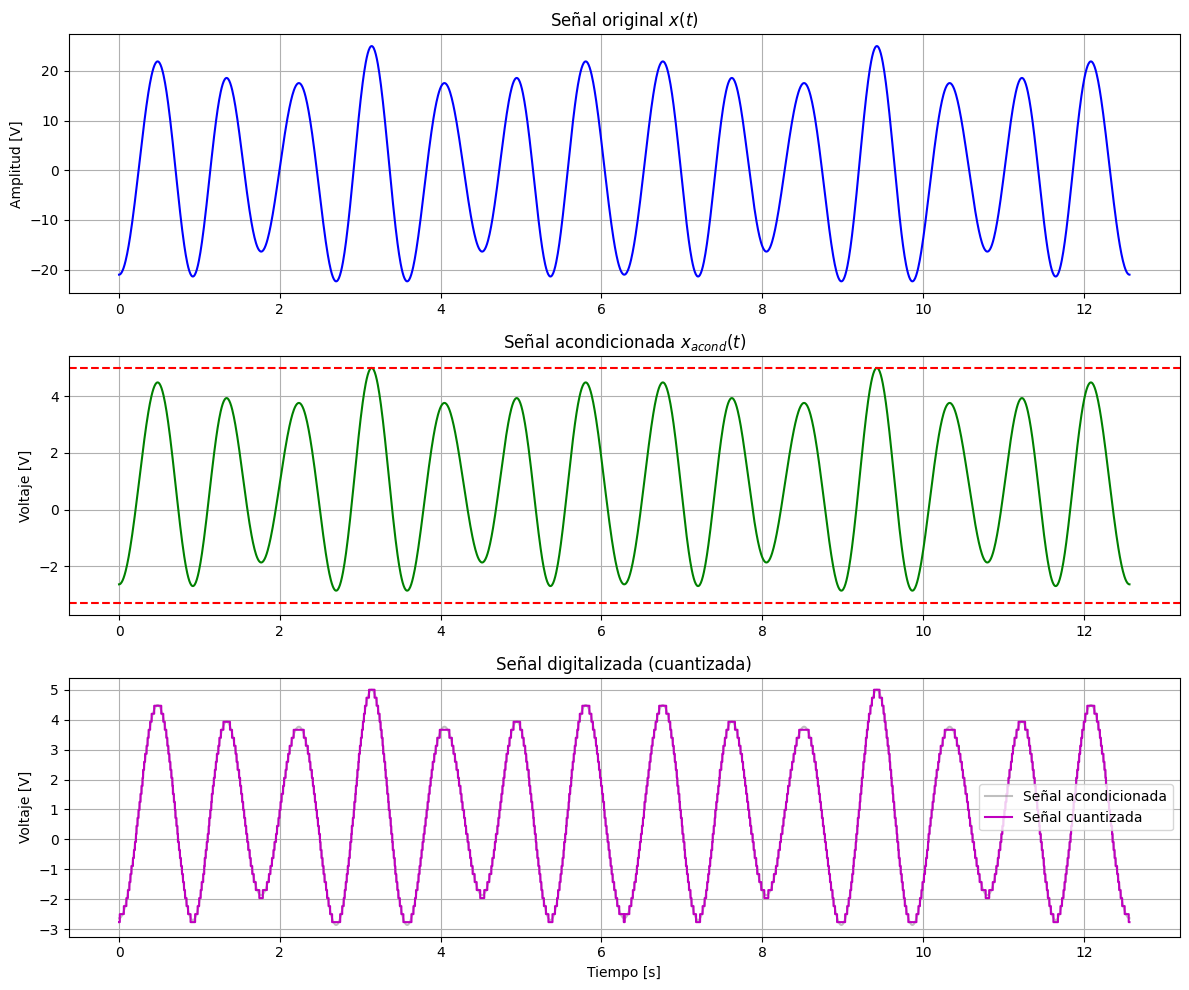

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Parámetros del sistema
# ------------------------------

# Resolución del ADC
bits = 5
niveles_adc = 2**bits  # 32 niveles

# Rango del ADC
v_min = -3.3
v_max = 5.0
rango_adc = v_max - v_min

# Paso de cuantización
delta = rango_adc / (niveles_adc - 1)

# Acondicionamiento lineal (calculado antes)
a = 0.166  # Ganancia
b = 0.85   # Offset

# ------------------------------
# 2. Definición de la señal original
# ------------------------------

# Período fundamental: T = 2π (como se demostró)
T = 2 * np.pi
t = np.linspace(0, 2*T, 2000)  # Dos períodos, buena resolución temporal

# Señal original
x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# ------------------------------
# 3. Acondicionamiento de señal
# ------------------------------

x_acond = a * x + b

# ------------------------------
# 4. Cuantización
# ------------------------------

# Cuantización uniforme mid-tread
x_q = np.round((x_acond - v_min) / delta) * delta + v_min

# ------------------------------
# 5. Gráficas
# ------------------------------

plt.figure(figsize=(12, 10))

# Señal original
plt.subplot(3, 1, 1)
plt.plot(t, x, 'b')
plt.title("Señal original $x(t)$")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal acondicionada
plt.subplot(3, 1, 2)
plt.plot(t, x_acond, 'g')
plt.title("Señal acondicionada $x_{acond}(t)$")
plt.ylabel("Voltaje [V]")
plt.grid(True)
plt.axhline(y=v_min, color='r', linestyle='--', label='Rango ADC')
plt.axhline(y=v_max, color='r', linestyle='--')

# Señal cuantizada
plt.subplot(3, 1, 3)
plt.plot(t, x_acond, color='gray', alpha=0.5, label='Señal acondicionada')
plt.step(t, x_q, where='mid', color='m', label='Señal cuantizada')
plt.title("Señal digitalizada (cuantizada)")
plt.ylabel("Voltaje [V]")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Conclusion:Se digitalizó una señal periódica adaptándola al rango de un ADC de 5 bits (
[
−
3.3
 V
,
5.0
 V
]
[−3.3 V,5.0 V]) mediante un acondicionamiento lineal y cuantización uniforme. El proceso aseguró una correcta representación digital sin pérdida significativa de información.

PUNTO 2

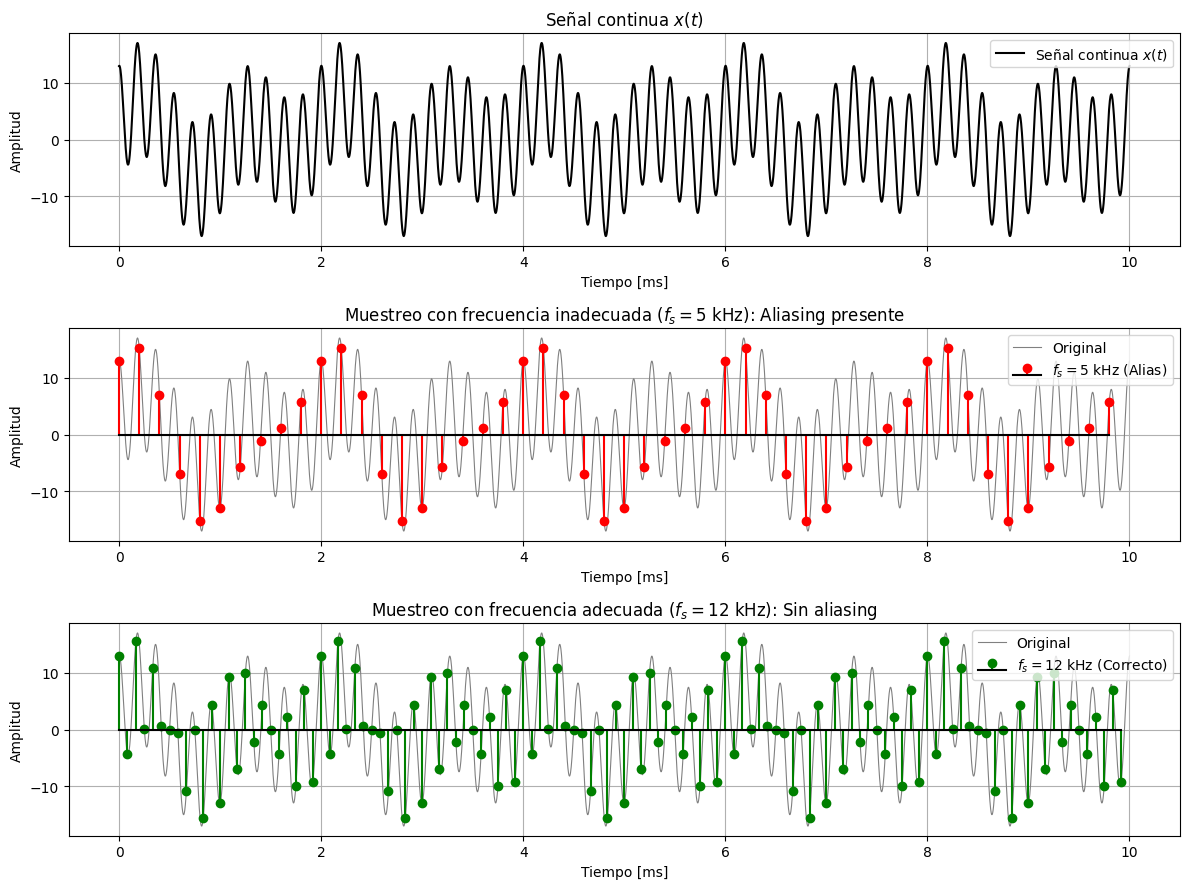

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Parámetros de la señal
# -------------------------------

# Frecuencias en Hz
f1 = 500
f2 = 1000
f3 = 5500

# Amplitudes
A1 = 3
A2 = 5
A3 = 10

# Frecuencias de muestreo
fs_inadecuada = 5000   # No cumple Nyquist (aliasing)
fs_adecuada = 12000    # Sí cumple Nyquist

# Duración de la simulación (10 ms para ver aliasing mejor)
t_max = 0.01  # 10 ms

# -------------------------------
# 2. Tiempo continuo y señal original
# -------------------------------

t_cont = np.linspace(0, t_max, 5000)
x_t = A1 * np.cos(2 * np.pi * f1 * t_cont) + \
      A2 * np.sin(2 * np.pi * f2 * t_cont) + \
      A3 * np.cos(2 * np.pi * f3 * t_cont)

# -------------------------------
# 3. Muestreo con fs inadecuada (aliasing)
# -------------------------------

n_inadecuado = np.arange(0, t_max, 1/fs_inadecuada)
x_n_inadecuado = A1 * np.cos(2 * np.pi * f1 * n_inadecuado) + \
                 A2 * np.sin(2 * np.pi * f2 * n_inadecuado) + \
                 A3 * np.cos(2 * np.pi * f3 * n_inadecuado)

# -------------------------------
# 4. Muestreo con fs adecuada (sin aliasing)
# -------------------------------

n_adecuado = np.arange(0, t_max, 1/fs_adecuada)
x_n_adecuado = A1 * np.cos(2 * np.pi * f1 * n_adecuado) + \
               A2 * np.sin(2 * np.pi * f2 * n_adecuado) + \
               A3 * np.cos(2 * np.pi * f3 * n_adecuado)

# -------------------------------
# 5. Gráficas
# -------------------------------

plt.figure(figsize=(12, 9))

# Señal continua
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1000, x_t, 'k', label='Señal continua $x(t)$')
plt.title('Señal continua $x(t)$', fontsize=12)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal muestreada con frecuencia INADECUADA (aliasing)
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1000, x_t, 'gray', linewidth=0.8, label='Original')
plt.stem(n_inadecuado * 1000, x_n_inadecuado, linefmt='r-', markerfmt='ro', basefmt='k-', label='$f_s=5$ kHz (Alias)')
plt.title('Muestreo con frecuencia inadecuada ($f_s=5$ kHz): Aliasing presente', fontsize=12)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal muestreada con frecuencia ADECUADA (sin aliasing)
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1000, x_t, 'gray', linewidth=0.8, label='Original')
plt.stem(n_adecuado * 1000, x_n_adecuado, linefmt='g-', markerfmt='go', basefmt='k-', label='$f_s=12$ kHz (Correcto)')
plt.title('Muestreo con frecuencia adecuada ($f_s=12$ kHz): Sin aliasing', fontsize=12)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Conclusion:Al muestrear una señal continua compuesta por múltiples frecuencias, es fundamental que la frecuencia de muestreo cumpla con el teorema de Nyquist, es decir, debe ser mayor al doble de la frecuencia más alta presente en la señal. En este ejercicio, cuando se utilizó una frecuencia de muestreo inadecuada (5 kHz), apareció aliasing, que distorsionó la señal al hacer que componentes de alta frecuencia se reflejen como frecuencias más bajas. En cambio, al usar una frecuencia adecuada (12 kHz), la señal fue muestreada correctamente, conservando su forma y contenido espectral.

PUNTO 3

In [10]:
import sympy as sp

# Declaramos las variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)
pi = sp.pi

# Frecuencia angular
w0 = 2 * pi / T

# Definimos x1(t) = A cos(w0 t)
x1 = A * sp.cos(w0 * t)

# Definimos x2(t) como función por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Diferencia al cuadrado entre señales
diff_sq = sp.simplify((x1 - x2)**2)

# Definimos la distancia media como la integral del error cuadrático medio
# Partimos la integral en tres tramos
int1 = sp.integrate(diff_sq, (t, 0, T/4))
int2 = sp.integrate(diff_sq, (t, T/4, 3*T/4))
int3 = sp.integrate(diff_sq, (t, 3*T/4, T))

# Sumamos los tramos y dividimos por T
d = (int1 + int2 + int3) / T

# Simplificamos la expresión
d_simplified = sp.simplify(d)

# Mostramos el resultado final
sp.pprint(d_simplified, use_unicode=True)


 2          
A    4⋅A    
── - ─── + 1
2     π     


Conclusion:En este ejercicio calculamos la distancia media entre dos señales periódicas
𝑥
1
(
𝑡
)
=
𝐴
cos
⁡
(
2
𝜋
𝑇
𝑡
)
x
1
​
 (t)=Acos(
T
2π
​
 t) y una señal por tramos
𝑥
2
(
𝑡
)
x
2
​
 (t). Utilizamos la fórmula basada en la potencia media del error cuadrático entre ambas señales.

Tras resolver la integral a mano y confirmar con SymPy, obtuvimos que la distancia media es:

𝑑
(
𝑥
1
,
𝑥
2
)
=
𝐴
2
2
−
4
𝐴
𝜋
+
1
d(x
1
​
 ,x
2
​
 )=
2
A
2

​
 −
π
4A
​
 +1
Este valor cuantifica qué tan diferentes son ambas señales en promedio durante un periodo
𝑇
T, considerando la forma de onda y sus discrepancias.

PUNTO 4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")  # Oculta algunos warnings por derivadas numéricas

# -----------------------------
# Parámetros de la señal x(t)
# -----------------------------
T = 10          # Periodo de la señal
A = 2           # Amplitud del valor constante
d1 = 1          # Punto de inicio del escalón descendente
d2 = 3          # Punto de fin del escalón
w0 = 2 * np.pi / T  # Frecuencia angular fundamental

# -----------------------------
# Eje de tiempo para simular una semiperiodo [-T/2, T/2]
# -----------------------------
num_points = 2000
t = np.linspace(-T/2, T/2, num_points)
dt = t[1] - t[0]  # Paso temporal para derivación numérica

# -----------------------------
# Construcción de la señal x(t) definida por tramos
# -----------------------------
x = np.zeros_like(t)
for i in range(num_points):
    if -T/2 <= t[i] < -d2:
        x[i] = 0
    elif -d2 <= t[i] <= -d1:
        x[i] = (-A / (d2 - d1)) * (t[i] + d2)
    elif -d1 < t[i] < d1:
        x[i] = -A
    elif d1 <= t[i] <= d2:
        x[i] = (A / (d2 - d1)) * (t[i] - d2)
    elif d2 < t[i] <= T/2:
        x[i] = 0

# -----------------------------
# Segunda derivada de x(t) con diferencias finitas
# -----------------------------
x2p = np.gradient(np.gradient(x, dt), dt)

# -----------------------------
# Función para calcular y graficar la reconstrucción y el espectro
# -----------------------------
def pltest(Na):
    """
    Calcula la reconstrucción de la señal x(t) a partir de la segunda derivada
    usando N armónicos, y muestra sus espectros.

    Parámetro:
    Na -- Número de armónicos utilizados para reconstrucción
    """
    # Inicializa coeficientes an y bn
    an = np.zeros(Na + 1)
    bn = np.zeros(Na + 1)

    # Cálculo de coeficientes an y bn a partir de la segunda derivada de x(t)
    for n in range(1, Na + 1):
        an[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.cos(n * w0 * t), t)
        bn[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.sin(n * w0 * t), t)

    # Coeficiente a0 calculado directamente desde x(t)
    a0 = (2 / T) * np.trapz(x, t)

    # Reconstrucción de la señal x(t) a partir de los coeficientes
    x_recon = np.full_like(t, a0 / 2)
    for n in range(1, Na + 1):
        x_recon += an[n] * np.cos(n * w0 * t) + bn[n] * np.sin(n * w0 * t)

    # Error relativo de la reconstrucción
    error_rel = np.linalg.norm(x - x_recon) / np.linalg.norm(x)
    print(f"Error relativo de reconstrucción (n=±{Na}): {error_rel:.6f}")

    # -----------------------------
    # Cálculo de espectros
    # -----------------------------
    n_vals = np.arange(0, Na + 1)
    magnitudes = np.sqrt(an**2 + bn**2)
    fases = np.arctan2(-bn, an)  # Fase: arctan(-bn/an)
    parte_real = an
    parte_imaginaria = -bn

    # -----------------------------
    # Gráfica: Señal original vs reconstrucción
    # -----------------------------
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label='x(t)', color='orange')
    plt.plot(t, x_recon, '--', label='Reconstrucción', color='blue')
    plt.title(f"Reconstrucción de x(t) con N = {Na}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Gráficas del espectro (4 subplots)
    # -----------------------------
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].stem(n_vals, magnitudes, basefmt=" ")
    axs[0, 0].set_title("Magnitud")
    axs[0, 0].set_xlabel("n")
    axs[0, 0].set_ylabel("|Cₙ|")

    axs[0, 1].stem(n_vals, fases, basefmt=" ")
    axs[0, 1].set_title("Fase")
    axs[0, 1].set_xlabel("n")
    axs[0, 1].set_ylabel("Fase [rad]")

    axs[1, 0].stem(n_vals, parte_real, basefmt=" ")
    axs[1, 0].set_title("Parte Real")
    axs[1, 0].set_xlabel("n")
    axs[1, 0].set_ylabel("Re{Cₙ}")

    axs[1, 1].stem(n_vals, parte_imaginaria, basefmt=" ")
    axs[1, 1].set_title("Parte Imaginaria")
    axs[1, 1].set_xlabel("n")
    axs[1, 1].set_ylabel("Im{Cₙ}")

    for ax in axs.flat:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# -----------------------------
# Interfaz interactiva para variar el número de armónicos
# -----------------------------
interact(pltest, Na=(0, 5, 1))


interactive(children=(IntSlider(value=2, description='Na', max=5), Output()), _dom_classes=('widget-interact',…

<function __main__.pltest(Na)>

Conclusion:En este ejercicio se analizó una señal periódica definida por tramos, calculando su espectro de Fourier a partir de la segunda derivada. Se implementó una reconstrucción numérica utilizando una cantidad finita de armónicos. Se observó que, a medida que se incrementa el número de armónicos, la reconstrucción se aproxima cada vez mejor a la señal original, lo que demuestra la eficacia del análisis de Fourier para representar señales complejas mediante sumas de senos y cosenos. Además, se visualizó claramente cómo los coeficientes espectrales determinan las características clave de la señal en frecuencia.